# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values 
# we only need 2nd column so we take range 1 to 2, 1 is second column and in range 2 is excluded

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i -60: i, 0]) # 60 value range for each unit
    y_train.append(training_set_scaled[i, 0]) # xtrain has value form 0 to 59 and in ytrain we are taking value 60th
    # we want to predict 60th value based on 0-59 value range

# xtrain and ytrain are list we need to make them np array
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
# reshaping Xtrain from 2d to 3d as LSTM takes 3d input adn 3dimention represents..
'''
batch_size/observations: The number of sequences or samples in each batch.
time_steps: The number of time steps or elements in each sequence.
input_features/indicators: The number of features or variables at each time step.
'''
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
# extra dimension with a size of 1 to represent a single feature at each time step. 

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 

### Initialising the RNN

In [7]:
regressor = Sequential()

2023-10-23 17:46:43.281473: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-23 17:46:43.281495: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-23 17:46:43.281502: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-23 17:46:43.281688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-23 17:46:43.281859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # 20% neuron drop rate during training 
# return sequence is True as we are adding more layer and on last layer it will be False
# with return_sequences=True, the LSTM layer outputs the sequence of hidden states, which can be used for further processing.  
# with return_sequences=False, the LSTM layer outputs a single hidden state that summarizes the entire sequence. 

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True)) # no need to add input shape as we provided in first layer
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50)) # by default return sequence is set to False
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1)) # we just need 1 output as we are pridicting value in out case

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') # for rnn we can also use RMSprop optimizer

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


2023-10-23 17:54:27.958863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 22s 165ms/step - loss: 0.0356
Epoch 2/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0041
Epoch 3/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0033
Epoch 4/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0027
Epoch 5/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0027
Epoch 6/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0025
Epoch 7/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0021
Epoch 8/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0023
Epoch 9/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0021
Epoch 10/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0023
Epoch 11/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0021
Epoch 12/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0018
Epoch 13/100
38/38 [===============

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values 

### Getting the predicted stock price of 2017

In [16]:
# to predict january data we need 60 data points before 1st jan easy way is to concatinate train and test without changing original dataset
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

# we need to predict starting jan-3 as its starting date in test set so total length - test length
# it will give us jan3 data, 
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # data containing last 60 value, starting 60 days before 3jan and january data

# reshape and transform data (feature scaling)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80): # 60 before jan3 and jan data has 20 value so upper bound 80
    X_test.append(inputs[i -60: i, 0]) # 60 value range for each unit
     # xtest has value form 0 to 59 
    # we want to predict 60th value based on 0-59 value range

# xtest we need to make it np array
X_test = np.array(X_test)

# making it form 2d to 3d
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

In [17]:
# predict the result and inverse the scaling of data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


### Visualising the results

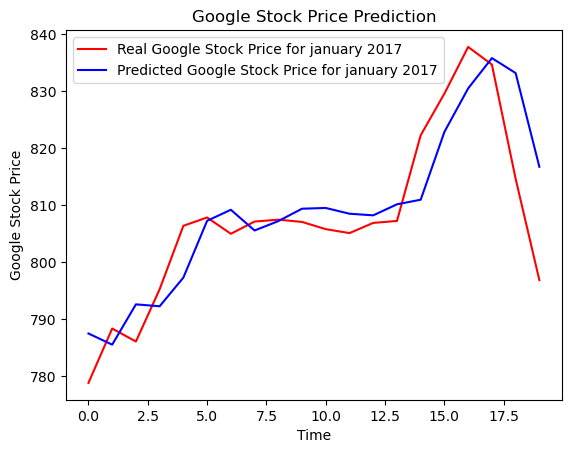

In [19]:
plt.plot(real_stock_price, color = 'red', label  = 'Real Google Stock Price for january 2017')
plt.plot(predicted_stock_price, color = 'blue', label  = 'Predicted Google Stock Price for january 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()